In [1]:
import matplotlib.pyplot as plt
from Objects.Simulation import Simulation
import numpy as np
import pickle
import pandas as pd
%pylab
%matplotlib inline

# Create cycler object. Use any styling from above you please
monochromeWithMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [ '.' ,'^']))
monochromeNoMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [',']))
monochrome = monochromeNoMarker.concat(monochromeWithMarker)
# Print examples of output from cycler object. 
# A cycler object, when called, returns a `iter.cycle` object that iterates over items indefinitely
print("number of items in monochrome:", len(monochrome))
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.prop_cycle'] = monochrome
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,5)
mpl.rcParams['figure.dpi']= 300
MARKEREVERY = 50

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
number of items in monochrome: 12


In [14]:
subFolder = "SG2-Human/"
human_avg_delay = pd.read_csv(subFolder+'human_avg_delay.csv',index_col=0)
human_max_delay = pd.read_csv(subFolder+'human_max_delay.csv',index_col=0)
human_vdr = pd.read_csv(subFolder+'human_vdr.csv',index_col=0)
subFolder = "SG2-LRT/"
av_avg_delay = pd.read_csv(subFolder+'av_avg_delay.csv',index_col=0)
av_max_delay = pd.read_csv(subFolder+'av_max_delay.csv',index_col=0)
av_vdr = pd.read_csv(subFolder+'av_vdr.csv',index_col=0)
cav_avg_delay = pd.read_csv(subFolder+'cav_avg_delay.csv',index_col=0)
cav_max_delay = pd.read_csv(subFolder+'cav_max_delay.csv',index_col=0)
cav_vdr = pd.read_csv(subFolder+'cav_vdr.csv',index_col=0)

subFolder = "SG2-HSR/"
av_hsr_avg_delay = pd.read_csv(subFolder+'av_avg_delay.csv',index_col=0)
av_hsr_max_delay = pd.read_csv(subFolder+'av_max_delay.csv',index_col=0)
av_hsr_vdr = pd.read_csv(subFolder+'av_vdr.csv',index_col=0)
cav_hsr_avg_delay = pd.read_csv(subFolder+'cav_avg_delay.csv',index_col=0)
cav_hsr_max_delay = pd.read_csv(subFolder+'cav_max_delay.csv',index_col=0)
cav_hsr_vdr = pd.read_csv(subFolder+'cav_vdr.csv',index_col=0)

varies= [human_avg_delay, human_max_delay, human_vdr, av_hsr_avg_delay, av_hsr_max_delay, av_hsr_vdr, cav_hsr_avg_delay, cav_hsr_max_delay]


mpl.rcParams['figure.dpi']= 300
xlabel = "green time (seconds)"
ylabel="speed limit (km)"

for df in varies:
    df.columns.name = xlabel


In [3]:
def cal_max_min_two_df(df1,df2):
    df1max = np.max(np.max(df1))
    df1min = np.min(np.min(df1))
    df2max = np.max(np.max(df2))
    df2min = np.min(np.min(df2))
    return max(df1max,df2max), min(df1min,df2min)
import seaborn as sns
sns.set()

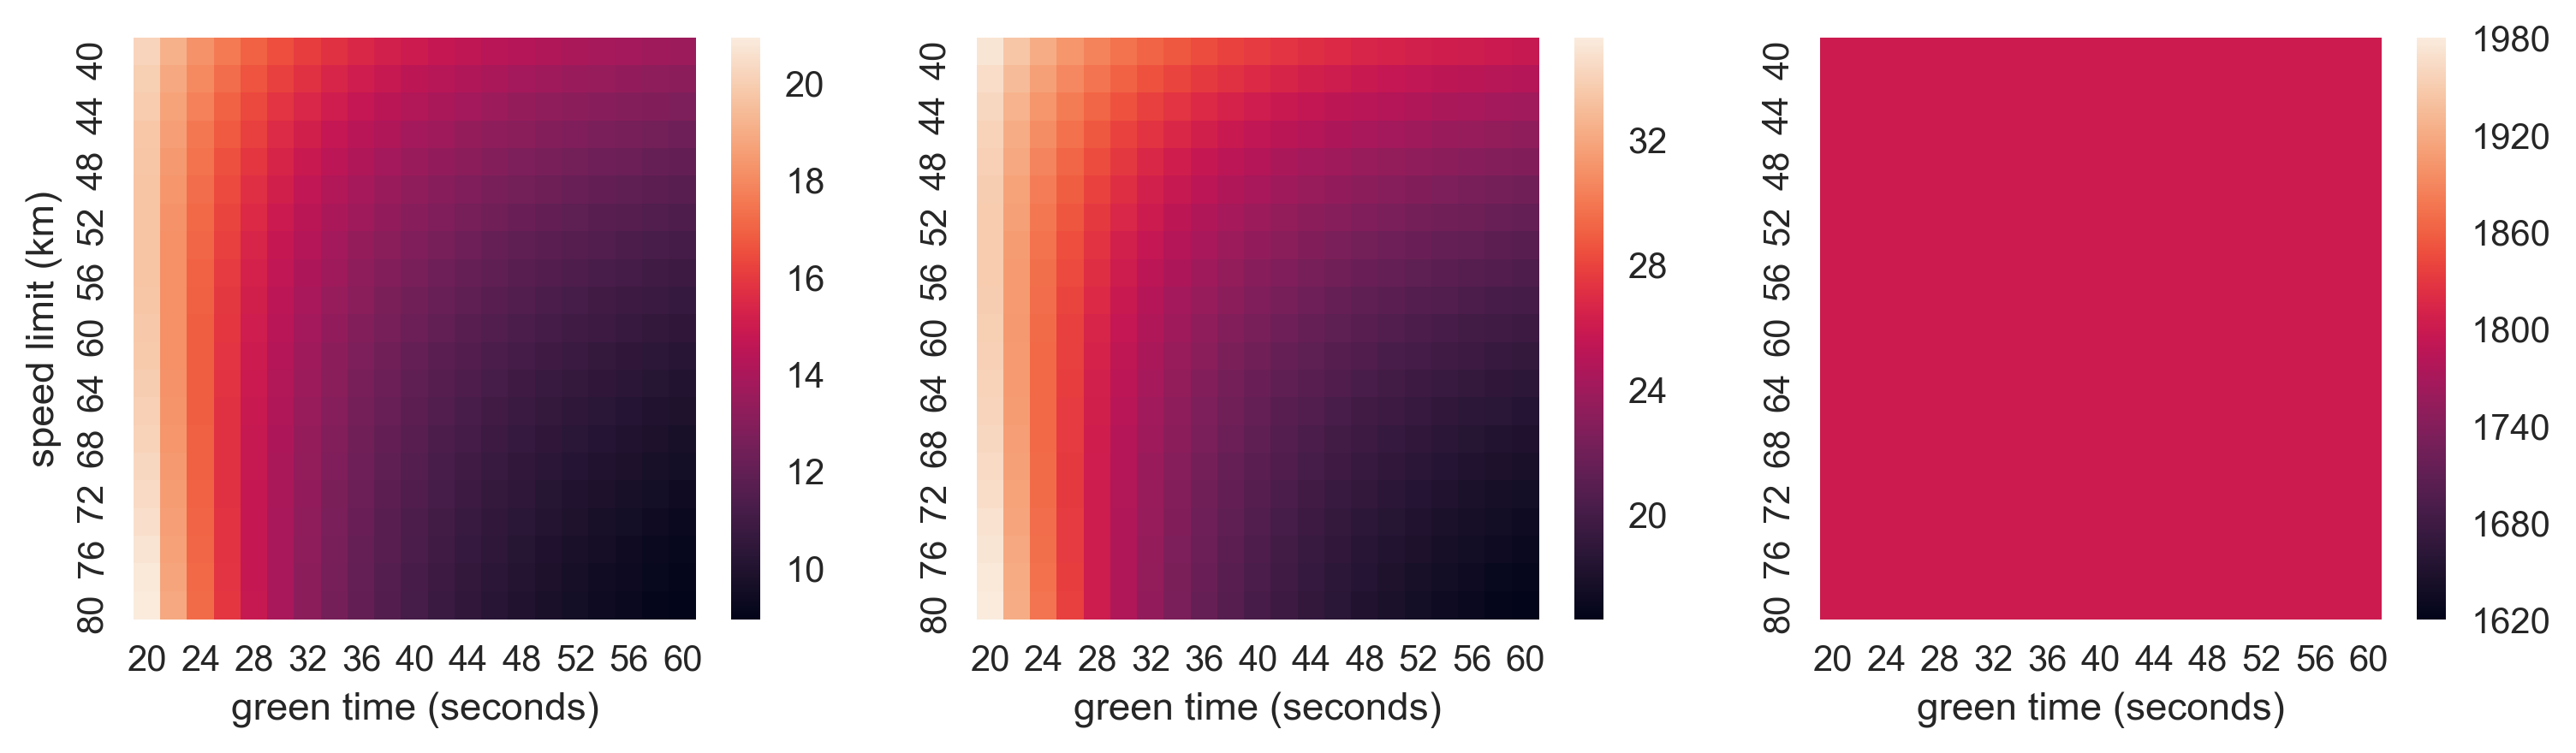

In [4]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
human_avg_delay.index.name = ylabel
sns.heatmap(human_avg_delay)
plt.subplot(1,3,2)
sns.heatmap(human_max_delay)
plt.subplot(1,3,3)
sns.heatmap(human_vdr)

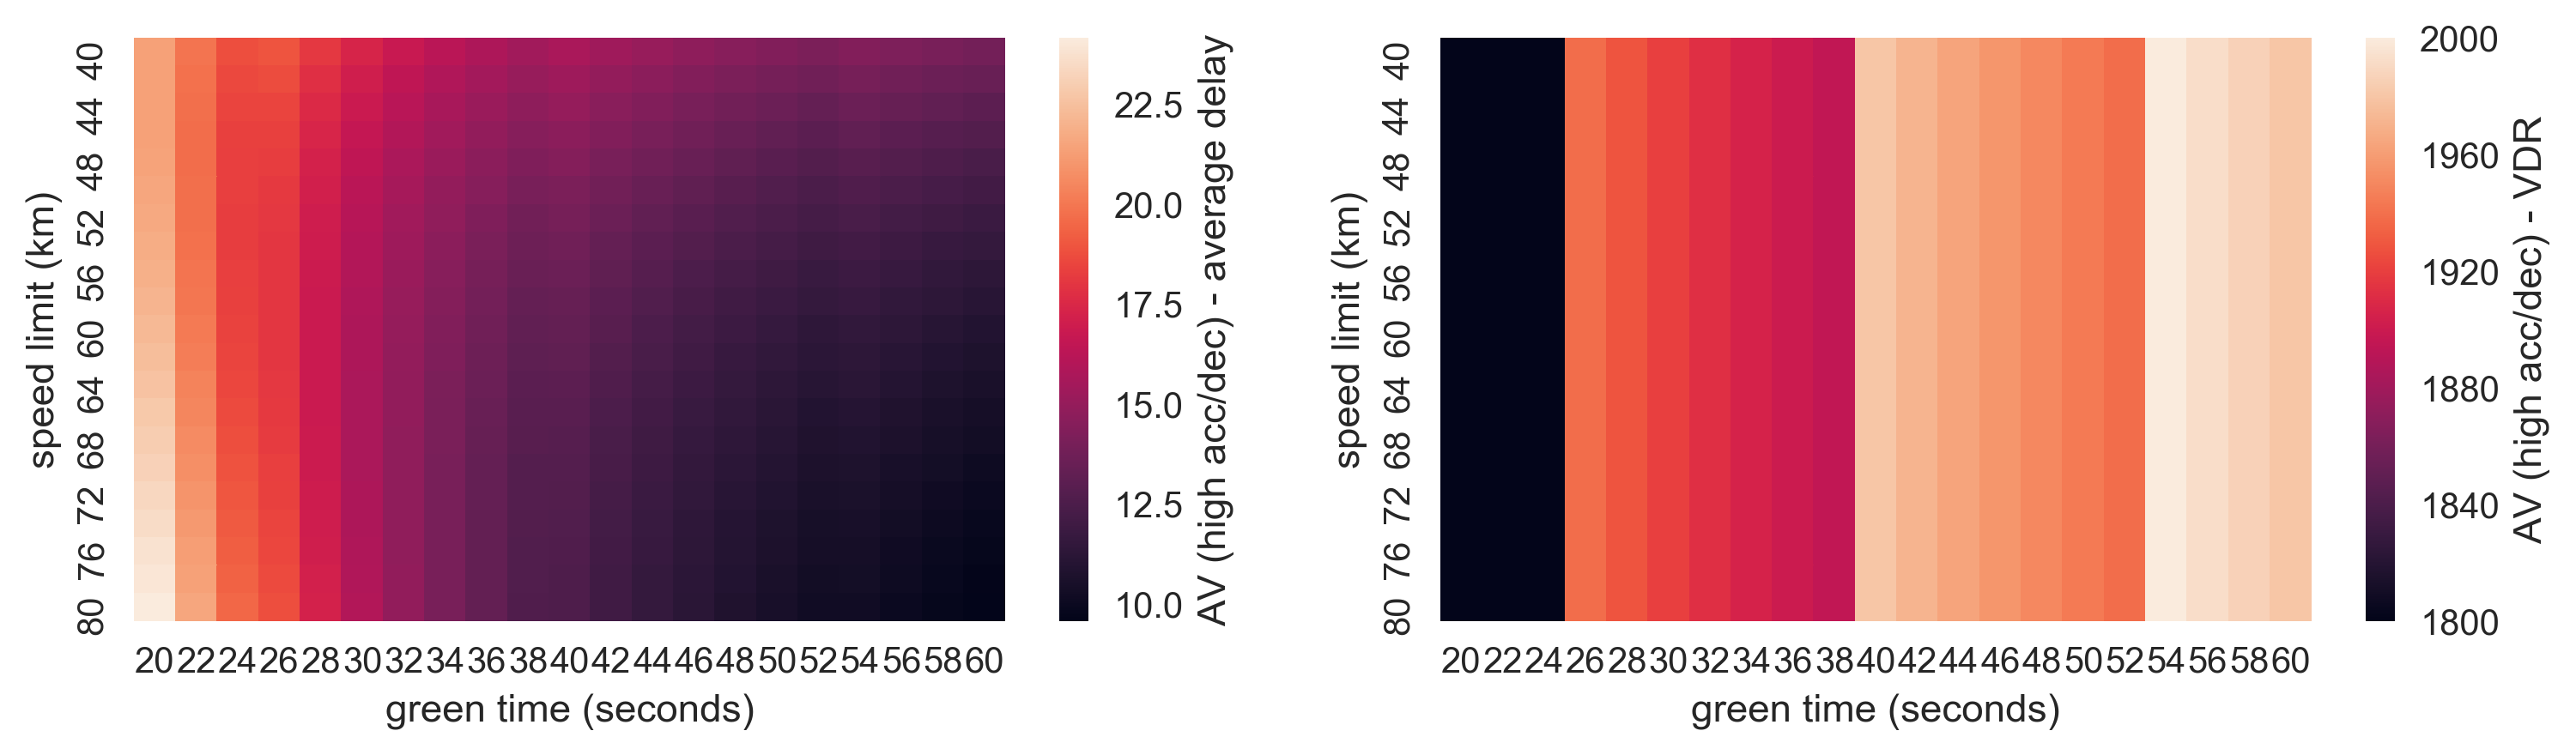

In [17]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
av_avg_delay.index.name = ylabel
av_avg_delay.columns.name = xlabel
sns.heatmap(av_avg_delay, cbar_kws={'label': 'AV (high acc/dec) - average delay'})
# plt.title('(a)')
plt.subplot(1,2,2)
av_vdr.index.name = ylabel
av_vdr.columns.name = xlabel
sns.heatmap(av_vdr, cbar_kws={'label': 'AV (high acc/dec) - VDR'})
# plt.title('(b)')


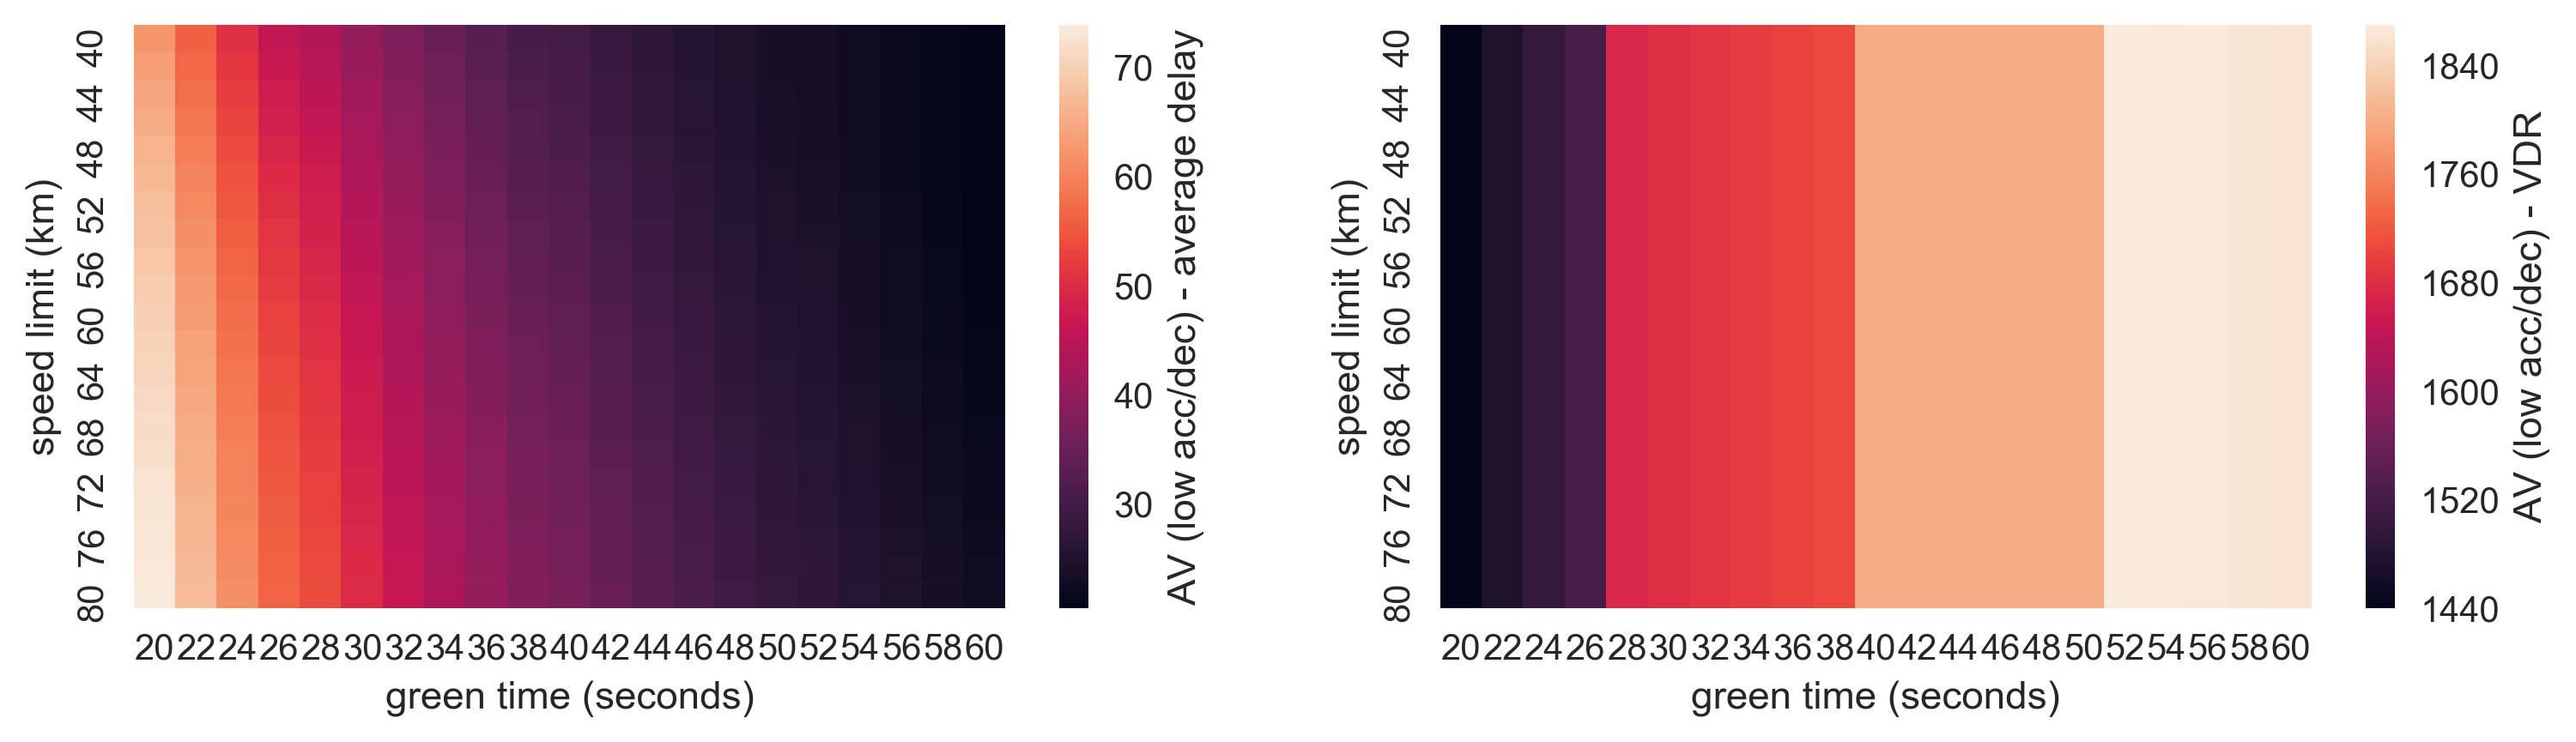

In [18]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
av_hsr_avg_delay.index.name = ylabel
av_hsr_avg_delay.columns.name = xlabel
sns.heatmap(av_hsr_avg_delay, cbar_kws={'label': 'AV (low acc/dec) - average delay'})
# plt.title('(c)')
plt.subplot(1,2,2)
av_hsr_vdr.index.name = ylabel
av_hsr_vdr.columns.name = xlabel
sns.heatmap(av_hsr_vdr, cbar_kws={'label': 'AV (low acc/dec) - VDR'})
# plt.title('(d)')

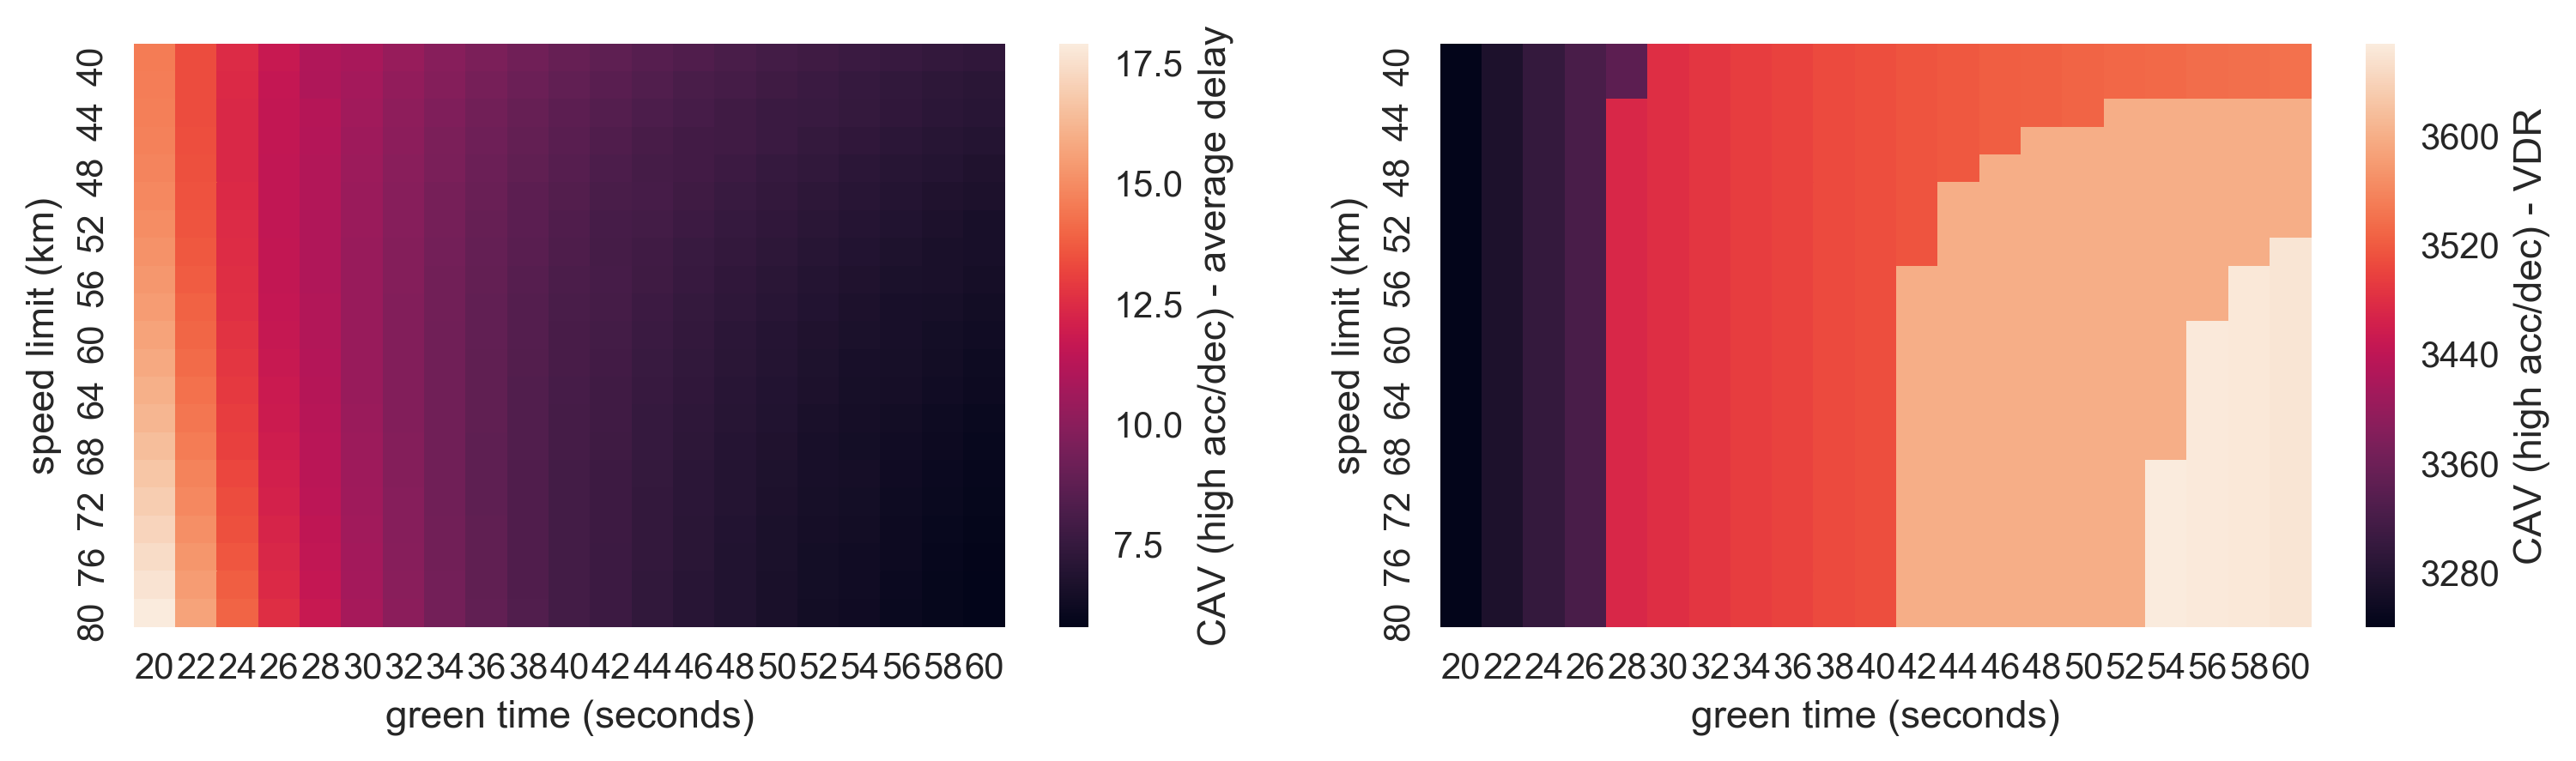

In [19]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
cav_avg_delay.index.name = ylabel
cav_avg_delay.columns.name = xlabel
sns.heatmap(cav_avg_delay, cbar_kws={'label': 'CAV (high acc/dec) - average delay'})
# plt.title('(a)')
plt.subplot(1,2,2)
cav_vdr.index.name = ylabel
cav_vdr.columns.name = xlabel
sns.heatmap(cav_vdr, cbar_kws={'label': 'CAV (high acc/dec) - VDR'})
# plt.title('(b)')

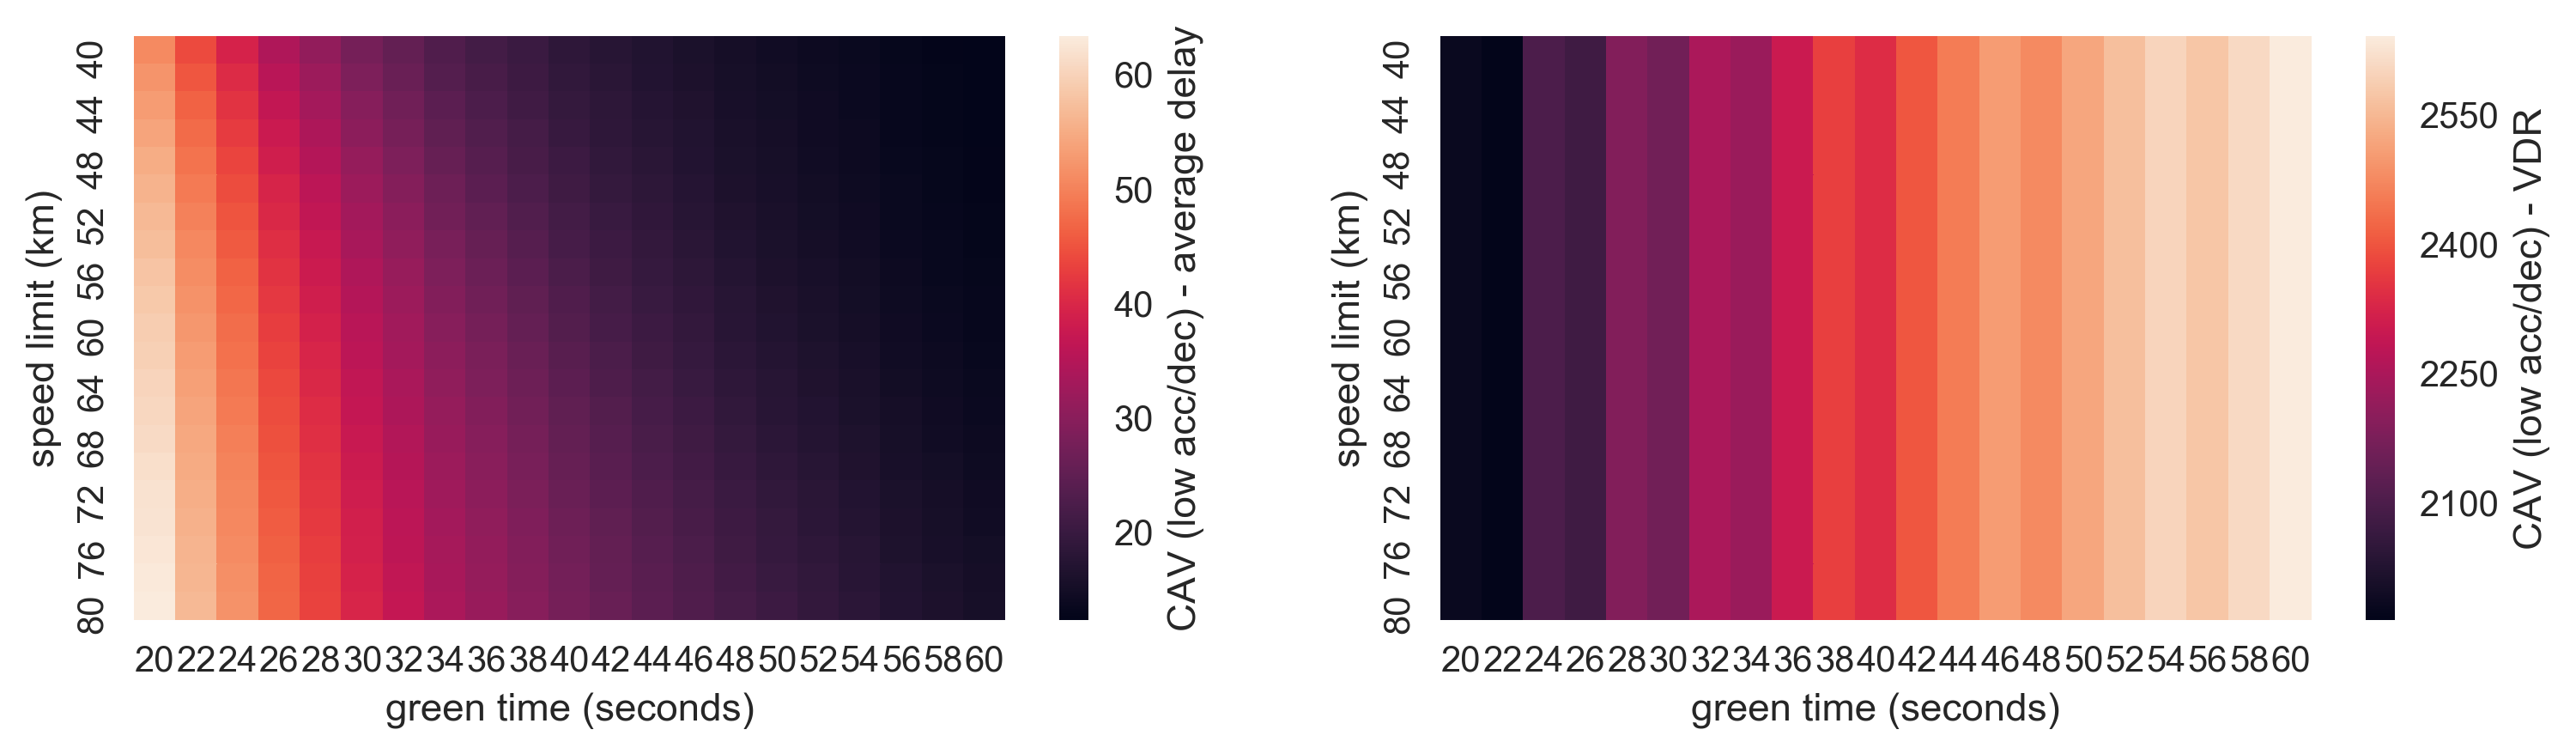

In [20]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
cav_hsr_avg_delay.index.name = ylabel
cav_hsr_avg_delay.columns.name = xlabel
sns.heatmap(cav_hsr_avg_delay, cbar_kws={'label': 'CAV (low acc/dec) - average delay'})
# plt.title('(c)')
plt.subplot(1,2,2)
cav_hsr_vdr.index.name = ylabel
cav_hsr_vdr.columns.name = xlabel
sns.heatmap(cav_hsr_vdr, cbar_kws={'label': 'CAV (low acc/dec) - VDR'})
# plt.title('(d)')

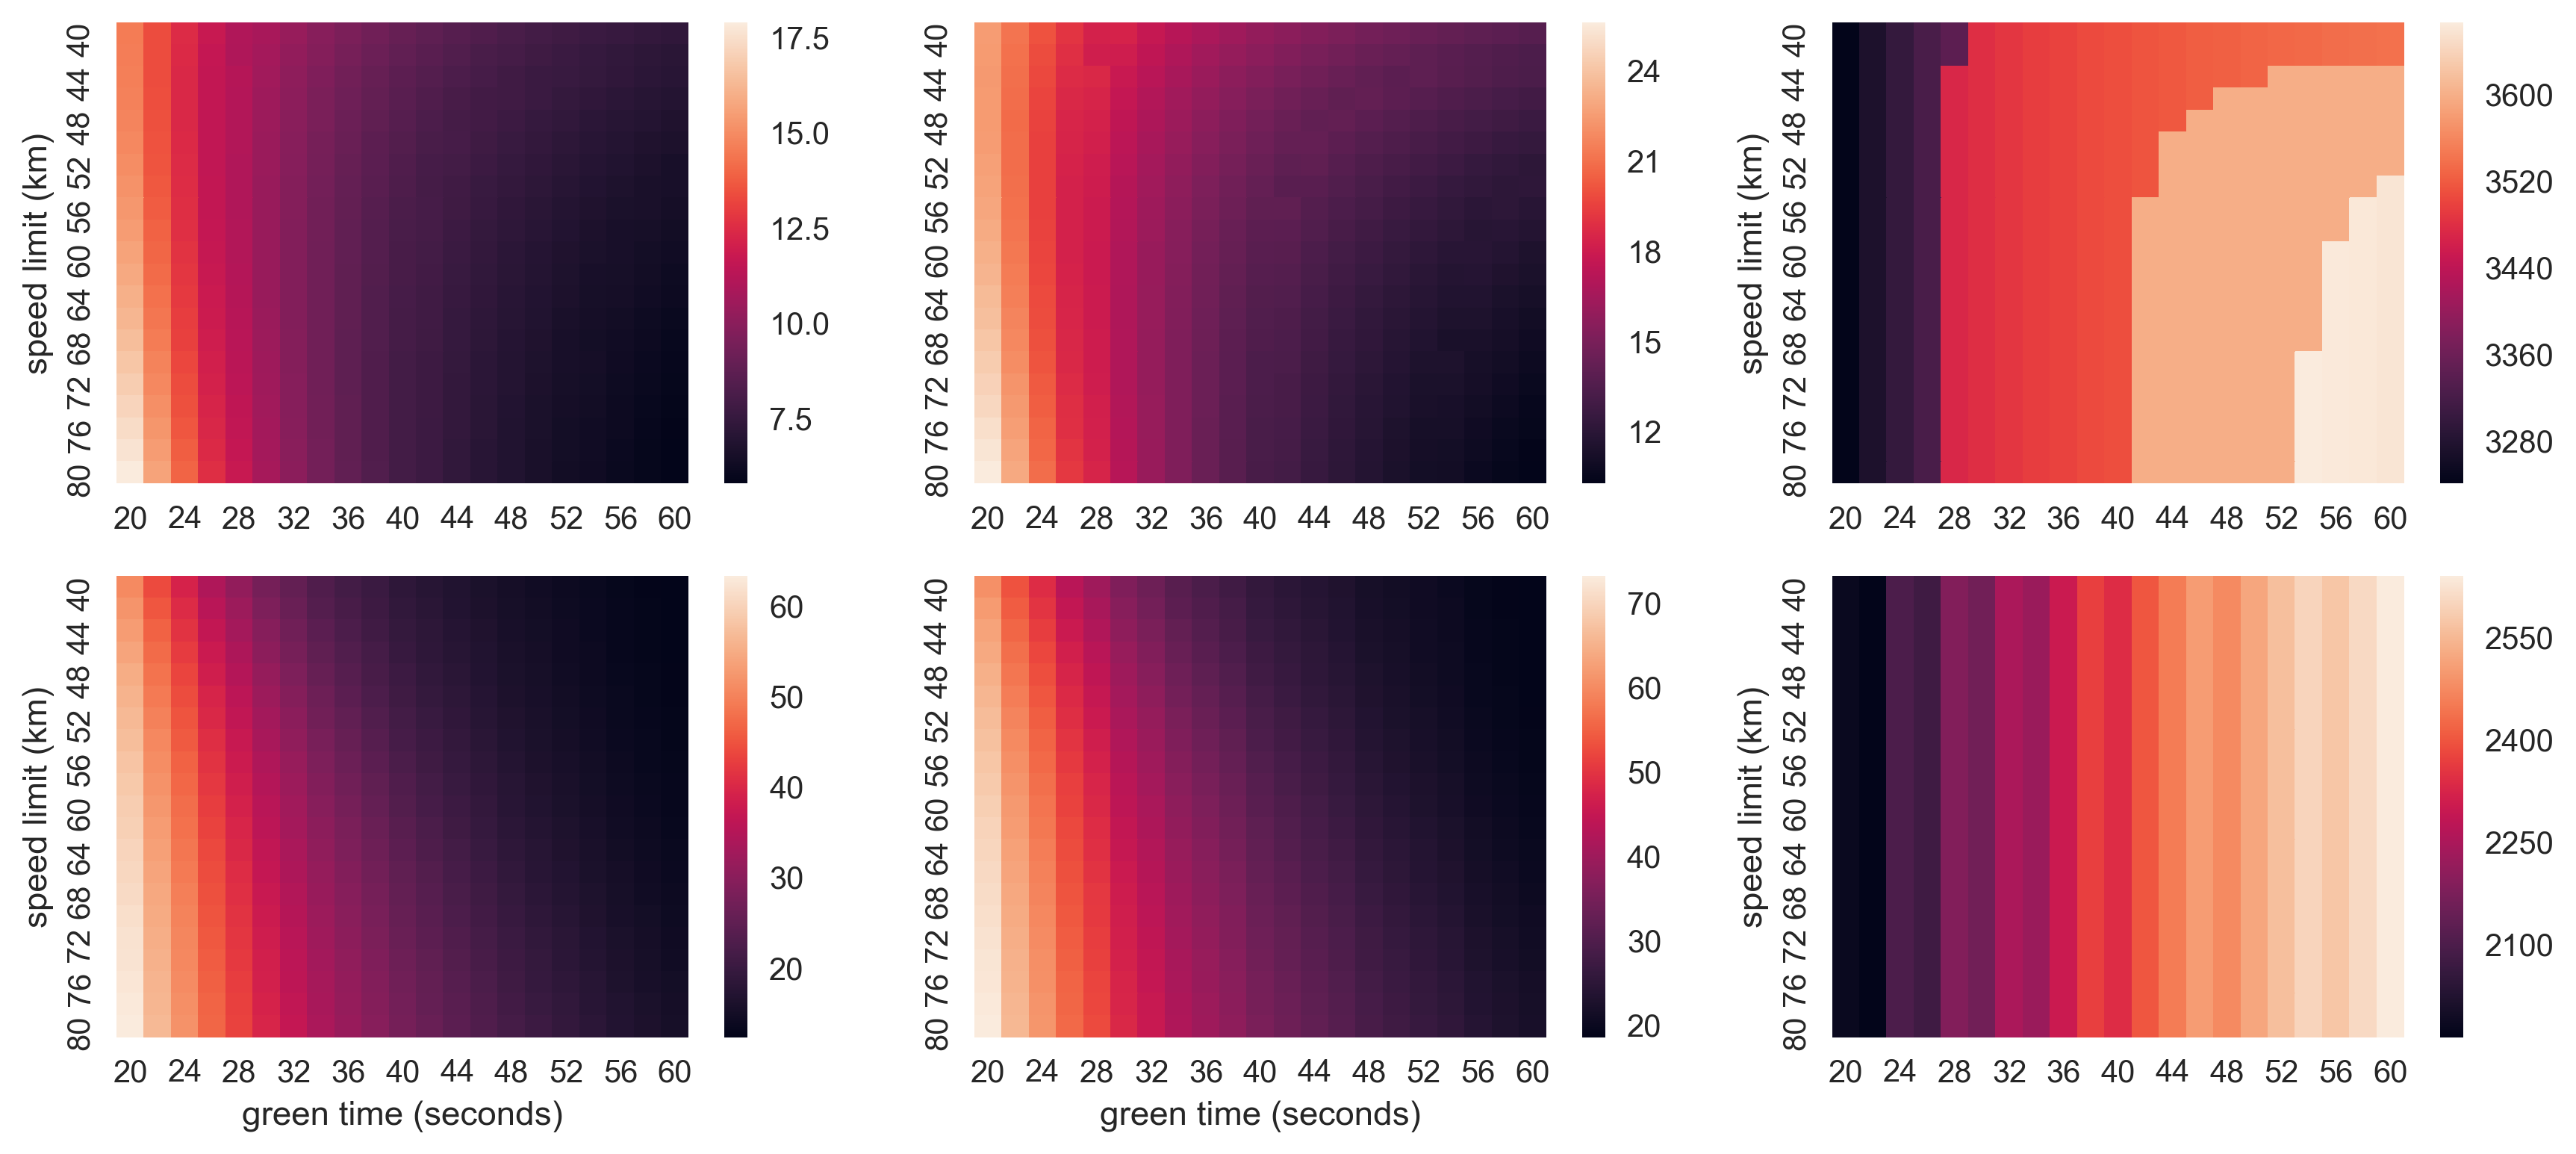

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
cav_avg_delay.index.name = ylabel
sns.heatmap(cav_avg_delay)
plt.subplot(2,3,2)
sns.heatmap(cav_max_delay)
plt.subplot(2,3,3)
sns.heatmap(cav_vdr)
plt.subplot(2,3,4)
cav_hsr_avg_delay.index.name = ylabel
sns.heatmap(cav_hsr_avg_delay)
plt.subplot(2,3,5)
sns.heatmap(cav_hsr_max_delay)
plt.subplot(2,3,6)
sns.heatmap(cav_hsr_vdr)